In [260]:
import scipy.io
import numpy as np
from tools import *
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


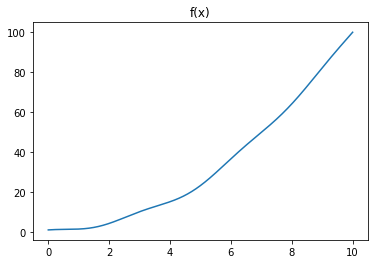

In [267]:
N = 1000
dt = .001
T = 10
t = np.arange(0,T,dt)
f = lambda t : np.sin(t)+np.cos(2*t)+t**2
fx = f(t)
plt.plot(t,fx)
plt.title('f(x)')
plt.show()

R = 4
L = len(t)-R


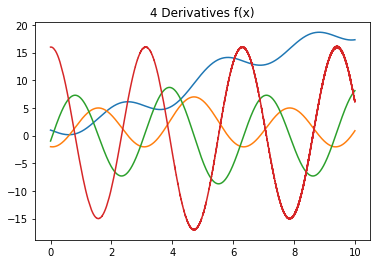

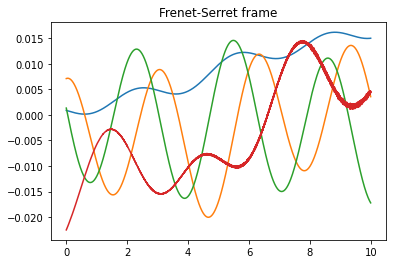

In [268]:
# build the derivative frame
dx = fx
gamma = np.zeros((L,R))
for r in range(R):
    dx = np.diff(dx)/dt
    gamma[:,r] = dx[:L]
    plt.plot(t[:L],dx[:L])
plt.title(f"{R} Derivatives f(x)")
plt.show()

# build Frenet-Serret frame
Q, _ = np.linalg.qr(gamma)
for r in range(R):
    if r == 0 or r == 1 or r == 2:
        sgn = -1
    else:
        sgn = 1
    plt.plot(t[:L],Q[:,r]*sgn)
plt.title(f"Frenet-Serret frame")
plt.show()



(9959, 41) (41, 41)


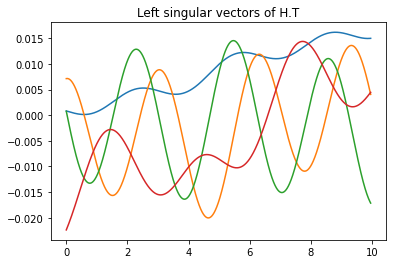

In [269]:
# time delay embed
m = 41
H = gen_hankel(fx, m, 1)
# center hankel matrix
H -= H[m//2]
V, S, U_T = np.linalg.svd(H.T, full_matrices=False)
print(V.shape, U_T.shape)

for r in range(R):
    if r == R-1 or r == 0:
        sgn = -1
    else:
        sgn = 1
    plt.plot(t[:len(V[:,r])],V[:,r]*sgn)
plt.title(f"Left singular vectors of H.T")
plt.show()
